# **Indicaciones**

No considerar las variables país, ni cliente_cod

1 Imputar la data con Knn k = 5

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

# **Pregunta 1**

In [5]:
url='/content/drive/MyDrive/PUCP-Catolica-MachineLearning/ventas lat long (3).xlsx'

In [6]:
train=pd.read_excel(url)

In [7]:
train.sample(50)

,pais,cliente_cod,tipo_cliente,cantidad,precio_unitario,valor_venta,costo,equipo,tipo_venta,cliente_x,cliente_y
4520,D11,C627,CLIENTE A,2.0,44775.00,1398.31,1.19,E1,VENTA LOCAL,-12.144535,-76.977755
2122,D3,C284,CLIENTE E,20.0,1.47,99500.00,1.00,EX,VENTA EXPORTACION,-12.140159,-76.960568
7033,D11,C707,CLIENTE A,5.0,45.76,91.52,16.46,E0,VENTA LOCAL,-12.137371,-76.963679
4978,D11,C163,CLIENTE A,3.0,33.99,1223.64,24.68,E3,VENTA LOCAL,-12.151818,-76.964438
6333,D11,C163,CLIENTE A,5.0,47.46,142.38,44881.00,E3,VENTA LOCAL,-12.148835,-76.972871
8915,D11,C281,CLIENTE A,7.0,1.19,1186.44,0.63,E1,VENTA LOCAL,-12.127676,-76.951224
2190,D3,C284,CLIENTE E,20.0,44564.00,2011.81,44682.00,EX,VENTA EXPORTACION,-12.140159,-76.960568
8439,D11,C175,CLIENTE A,7.0,1.36,406.78,0.64,E3,VENTA LOCAL,-12.151349,-76.960050
9080,D11,C295,CLIENTE A,7.0,0.85,85.00,0.69,E0,VENTA LOCAL,-12.141541,-76.978708
266,D1,C142,CLIENTE E,20.0,7.16,-129235.00,44777.00,EX,VENTA EXPORTACION,-12.298390,-76.851242


In [8]:
train.shape

(9999, 11)

In [9]:
train.dtypes

pais                object
cliente_cod         object
tipo_cliente        object
cantidad           float64
precio_unitario    float64
valor_venta        float64
costo              float64
equipo              object
tipo_venta          object
cliente_x          float64
cliente_y          float64
dtype: object

In [10]:
train.isnull().sum()

pais               0
cliente_cod        0
tipo_cliente       0
cantidad           0
precio_unitario    2
valor_venta        3
costo              2
equipo             0
tipo_venta         0
cliente_x          0
cliente_y          0
dtype: int64

In [11]:
train.isnull().sum().sum()

7

<AxesSubplot:>

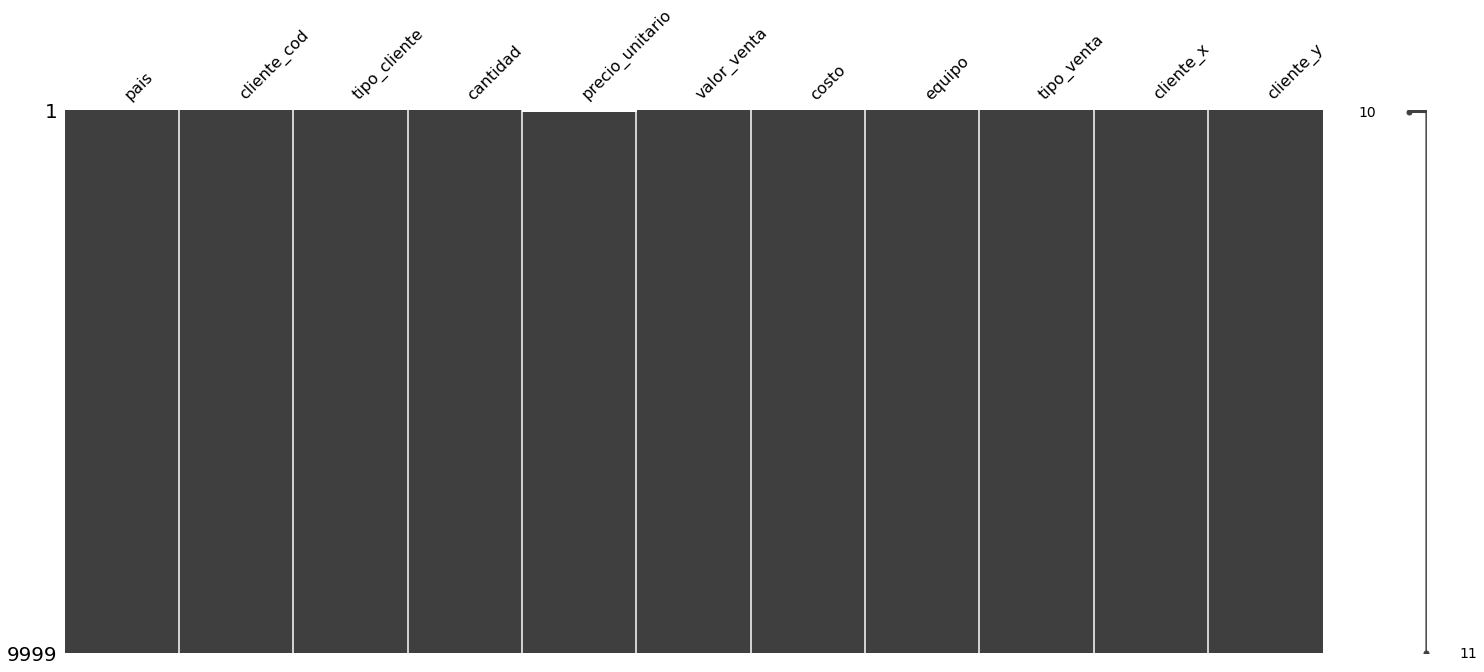

In [12]:
msno.matrix(train)

<AxesSubplot:>

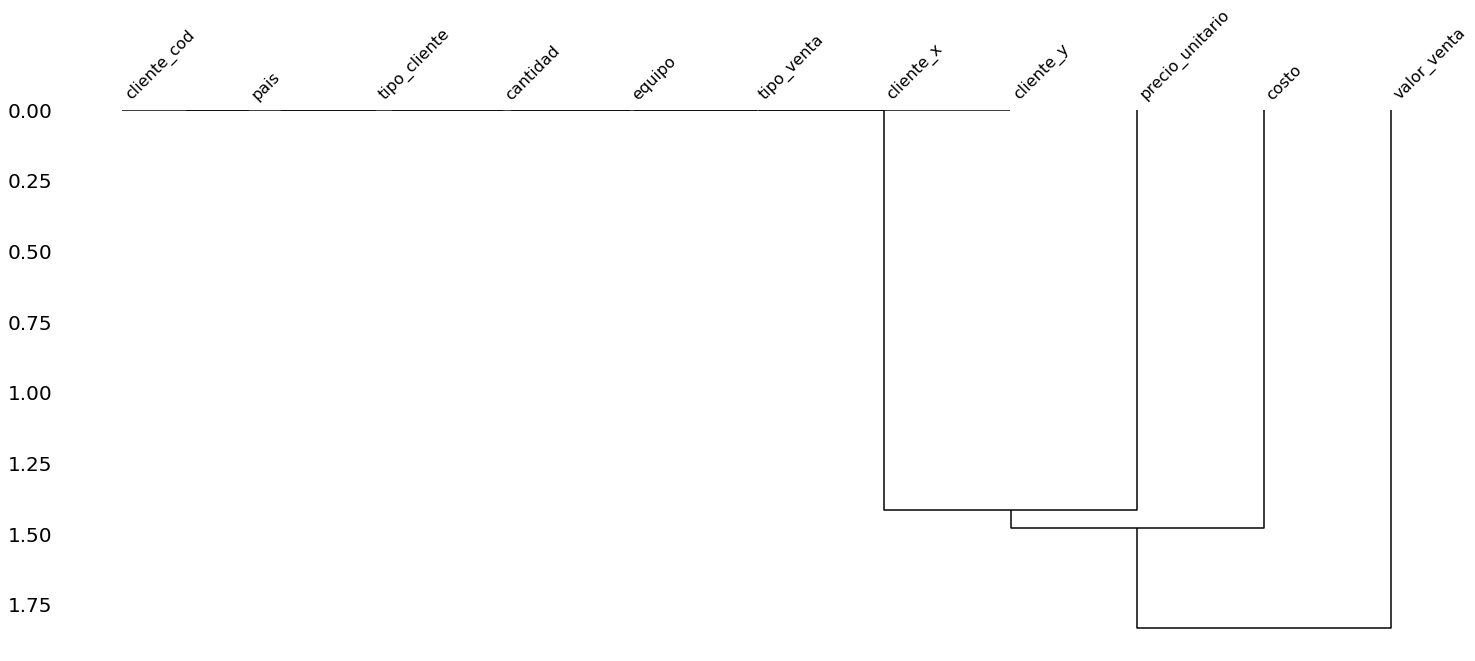

In [13]:
msno.dendrogram(train)

In [14]:
train[train.isnull().any(1)]

,pais,cliente_cod,tipo_cliente,cantidad,precio_unitario,valor_venta,costo,equipo,tipo_venta,cliente_x,cliente_y
11,D1,C142,CLIENTE E,9.0,7.43,NaN,4.21,EX,VENTA EXPORTACION,-12.29839,-76.851242
27,D1,C457,CLIENTE E,16.0,NaN,-196255.00,0.00,EX,VENTA EXPORTACION,-12.29839,-76.851242
42,D1,C457,CLIENTE E,16.0,195.12,NaN,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
44,D1,C457,CLIENTE E,16.0,201.60,NaN,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
45,D1,C457,CLIENTE E,16.0,NaN,13153.92,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
46,D1,C457,CLIENTE E,16.0,192.78,14072.94,NaN,EX,VENTA EXPORTACION,-12.29839,-76.851242
47,D1,C457,CLIENTE E,16.0,194.70,14213.10,NaN,EX,VENTA EXPORTACION,-12.29839,-76.851242


In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad,9999.0,11.051905,7.412597,1.000000,5.000000,7.000000,20.000000,2.300000e+01
precio_unitario,9997.0,4930.140448,14518.293769,-267996.000000,1.330000,2.750000,59.320000,4.492200e+04
valor_venta,9996.0,33720.123193,249052.430017,-328716.000000,178.000000,528.265000,1765.665000,2.955057e+06
costo,9997.0,5570.231228,14746.250936,0.000000,0.700000,1.570000,23.340000,4.490800e+04
cliente_x,9999.0,-12.146228,0.030058,-12.298390,-12.146970,-12.140159,-12.137284,-1.212424e+01
cliente_y,9999.0,-76.962303,0.022654,-76.979314,-76.972372,-76.965502,-76.960568,-7.685124e+01


**Columnas Categoricas y Numericas**

In [16]:
columna=train.columns

In [17]:
columna

Index(['pais', 'cliente_cod', 'tipo_cliente', 'cantidad', 'precio_unitario',
       'valor_venta', 'costo', 'equipo', 'tipo_venta', 'cliente_x',
       'cliente_y'],
      dtype='object')

In [18]:
#columna_numerica
columna_numerica=list(train.select_dtypes(include=['int64','float64']).columns)
columna_numerica

['cantidad',
 'precio_unitario',
 'valor_venta',
 'costo',
 'cliente_x',
 'cliente_y']

In [19]:
print('Cuantas columnas numericas existen :',len(columna_numerica))

Cuantas columnas numericas existen : 6


In [20]:
#columna_categorica
columna_categorica=list(train.select_dtypes(include=['object']).columns)
columna_categorica

['pais', 'cliente_cod', 'tipo_cliente', 'equipo', 'tipo_venta']

In [21]:
print('Cuantas columnas categoricas existen :',len(columna_categorica))

Cuantas columnas categoricas existen : 5


In [22]:
datos_1=[['Columna Numerica',len(columna_numerica)],['Columna Categorica',len(columna_categorica)]]
datos_1

[['Columna Numerica', 6], ['Columna Categorica', 5]]

In [23]:
datos_1 = pd.DataFrame(datos_1, columns=['Tipo', 'Cantidad'])
datos_1

,Tipo,Cantidad
0,Columna Numerica,6
1,Columna Categorica,5


In [24]:
fig=px.histogram(datos_1,x='Tipo',y='Cantidad',barmode='group',height=350)
fig.update_layout(title='Categorica vs Numerica')
fig.show()

print('En resumen existe 6 columnas numericas')
print('En resumen existen 5 columnas categoricas')

En resumen existe 6 columnas numericas
En resumen existen 5 columnas categoricas


**Analizar a las columnas categoricas**

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             9999 non-null   object 
 1   cliente_cod      9999 non-null   object 
 2   tipo_cliente     9999 non-null   object 
 3   cantidad         9999 non-null   float64
 4   precio_unitario  9997 non-null   float64
 5   valor_venta      9996 non-null   float64
 6   costo            9997 non-null   float64
 7   equipo           9999 non-null   object 
 8   tipo_venta       9999 non-null   object 
 9   cliente_x        9999 non-null   float64
 10  cliente_y        9999 non-null   float64
dtypes: float64(6), object(5)
memory usage: 859.4+ KB


In [26]:
train['tipo_cliente'].value_counts()

CLIENTE A    5996
CLIENTE E    4003
Name: tipo_cliente, dtype: int64

<Figure size 720x720 with 0 Axes>

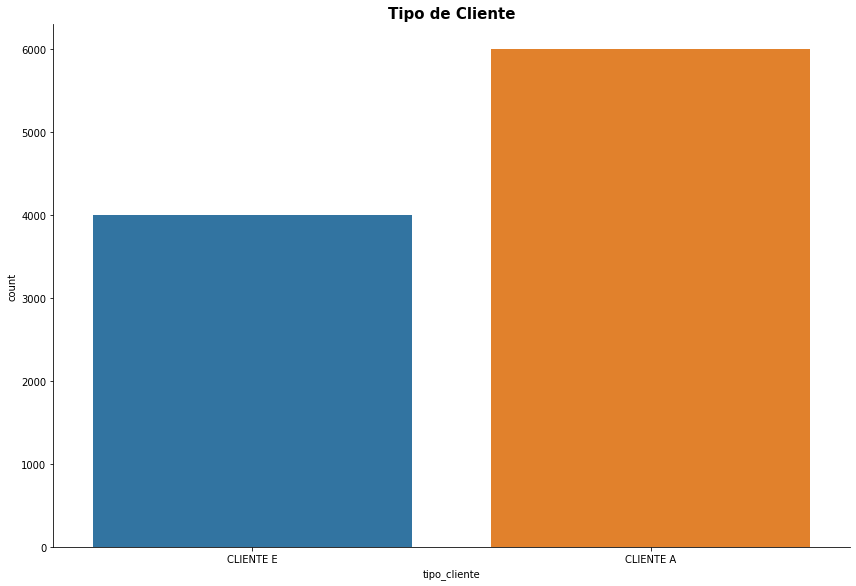

Existe mas clientes de tipo A que de tipo E


In [27]:
plt.figure(figsize=(10,10))
sns.catplot('tipo_cliente',data=train,kind='count',height=8,aspect=1.5)
plt.title('Tipo de Cliente',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

print('Existe mas clientes de tipo A que de tipo E')

In [28]:
train.groupby(['tipo_cliente','tipo_venta']).size()

tipo_cliente  tipo_venta       
CLIENTE A     VENTA LOCAL          5996
CLIENTE E     VENTA EXPORTACION    4003
dtype: int64

<Figure size 720x720 with 0 Axes>

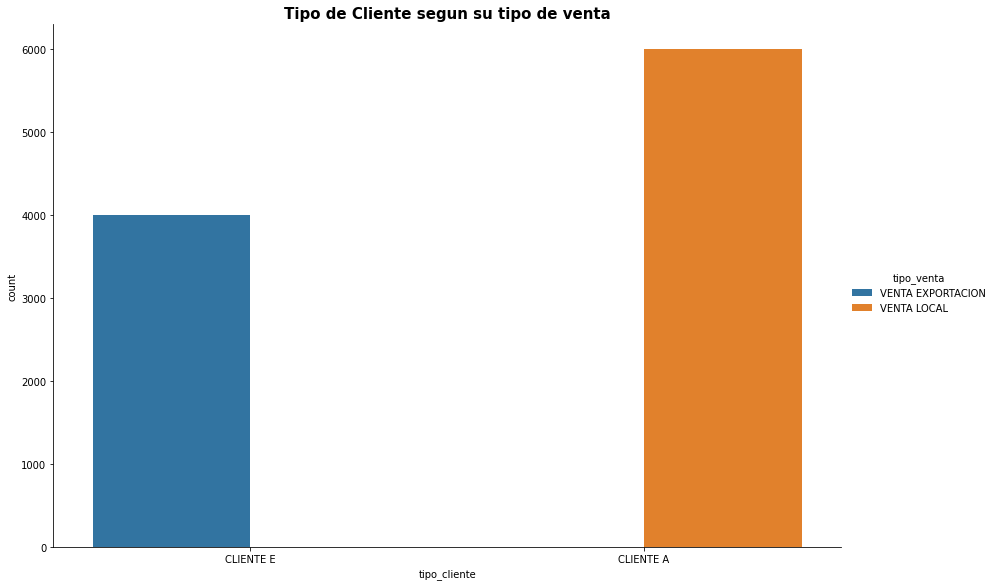

El cliente A se caracteriza por relizar venta_locales
El cliente E se caracteriza por realizar venta_exportaciones


In [29]:
plt.figure(figsize=(10,10))
sns.catplot('tipo_cliente',data=train,kind='count',height=8,aspect=1.5,hue='tipo_venta')
plt.title('Tipo de Cliente segun su tipo de venta',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

print('El cliente A se caracteriza por relizar venta_locales')
print('El cliente E se caracteriza por realizar venta_exportaciones')

In [30]:
train.head()

,pais,cliente_cod,tipo_cliente,cantidad,precio_unitario,valor_venta,costo,equipo,tipo_venta,cliente_x,cliente_y
0,D1,C142,CLIENTE E,9.0,44690.00,5700.24,9.34,EX,VENTA EXPORTACION,-12.29839,-76.851242
1,D1,C142,CLIENTE E,9.0,7.43,4323.68,4.21,EX,VENTA EXPORTACION,-12.29839,-76.851242
2,D1,C142,CLIENTE E,9.0,9.47,3410.75,6.77,EX,VENTA EXPORTACION,-12.29839,-76.851242
3,D1,C142,CLIENTE E,9.0,9.66,1738.26,7.68,EX,VENTA EXPORTACION,-12.29839,-76.851242
4,D1,C142,CLIENTE E,9.0,9.82,2238.16,7.78,EX,VENTA EXPORTACION,-12.29839,-76.851242


In [31]:
train['pais'].value_counts()

D11    5996
D1     1758
D3      790
D4      644
D8      318
D10     156
D2      121
D7      109
D5      105
D6        1
D9        1
Name: pais, dtype: int64

In [32]:
train.groupby(['pais','tipo_cliente','tipo_venta']).size()

pais  tipo_cliente  tipo_venta       
D1    CLIENTE E     VENTA EXPORTACION    1758
D10   CLIENTE E     VENTA EXPORTACION     156
D11   CLIENTE A     VENTA LOCAL          5996
D2    CLIENTE E     VENTA EXPORTACION     121
D3    CLIENTE E     VENTA EXPORTACION     790
D4    CLIENTE E     VENTA EXPORTACION     644
D5    CLIENTE E     VENTA EXPORTACION     105
D6    CLIENTE E     VENTA EXPORTACION       1
D7    CLIENTE E     VENTA EXPORTACION     109
D8    CLIENTE E     VENTA EXPORTACION     318
D9    CLIENTE E     VENTA EXPORTACION       1
dtype: int64

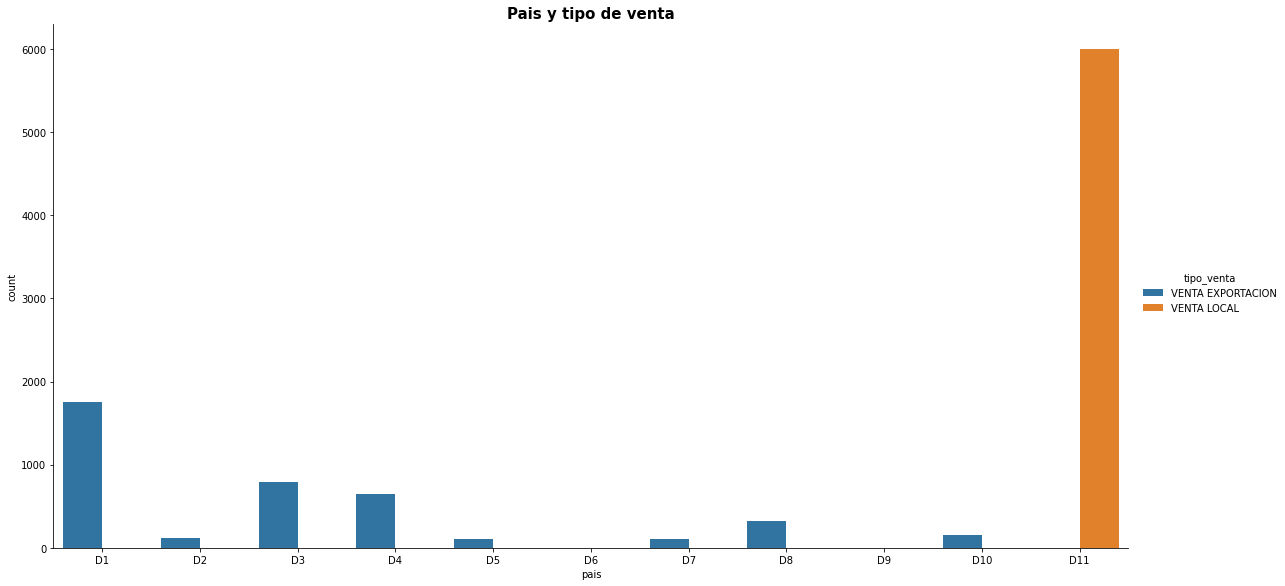

Segun el grafico el pais que mas realizo venta locales es el pais con D11
El pais D6 no realizo venta exportaciones y locales
El pais D1 es que realizo mas venta de exportacion


In [33]:
#Segun el grafico el pais que mas realizo venta locales es el pais con D11
#El pais D6 no realizo venta exportaciones y locales
#El pais D1 es que realizo mas venta de exportacion
sns.catplot('pais',data=train,kind='count',height=8,aspect=2.0,hue='tipo_venta')
plt.title('Pais y tipo de venta',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()
print('Segun el grafico el pais que mas realizo venta locales es el pais con D11')
print('El pais D6 no realizo venta exportaciones y locales')
print('El pais D1 es que realizo mas venta de exportacion')

In [34]:
train['cliente_cod'].value_counts()

C142    1704
C284     790
C163     617
C565     587
C627     567
        ... 
C852       1
C581       1
C589       1
C611       1
C221       1
Name: cliente_cod, Length: 454, dtype: int64

<Figure size 720x720 with 0 Axes>

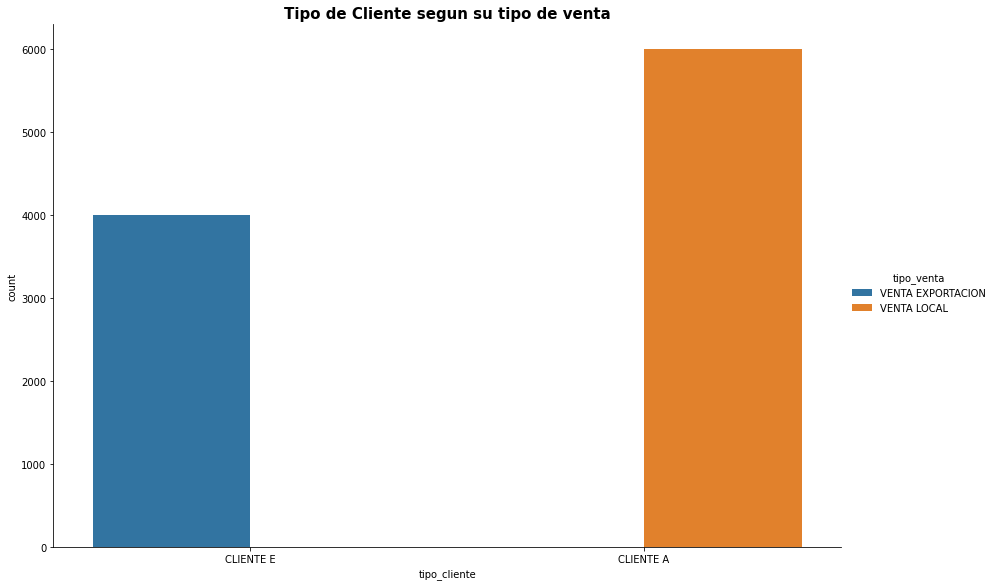

In [35]:
plt.figure(figsize=(10,10))
sns.catplot('tipo_cliente',data=train,kind='count',height=8,aspect=1.5,hue='tipo_venta')
plt.title('Tipo de Cliente segun su tipo de venta',fontweight='bold',fontname='Times New Roman',fontsize=15)
plt.show()

In [36]:
fig = px.histogram(train, x="tipo_cliente", y="precio_unitario",
             color='tipo_venta', barmode='group',
             height=400)
fig.update_layout(title='Tipo cliente segun el Tipo de venta Realizada')
fig.show()

**Analizar las Columnas Numericas**

In [37]:
columna_numerica

['cantidad',
 'precio_unitario',
 'valor_venta',
 'costo',
 'cliente_x',
 'cliente_y']

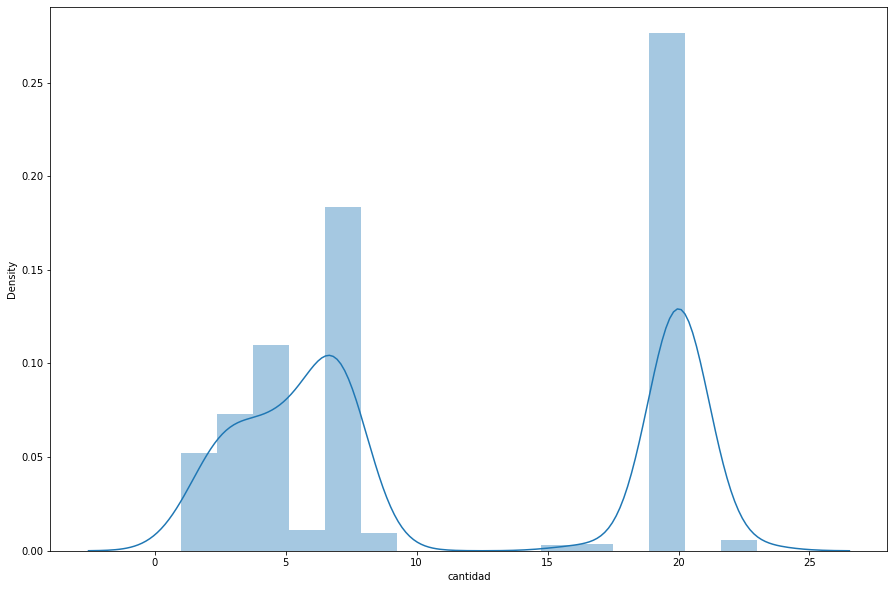

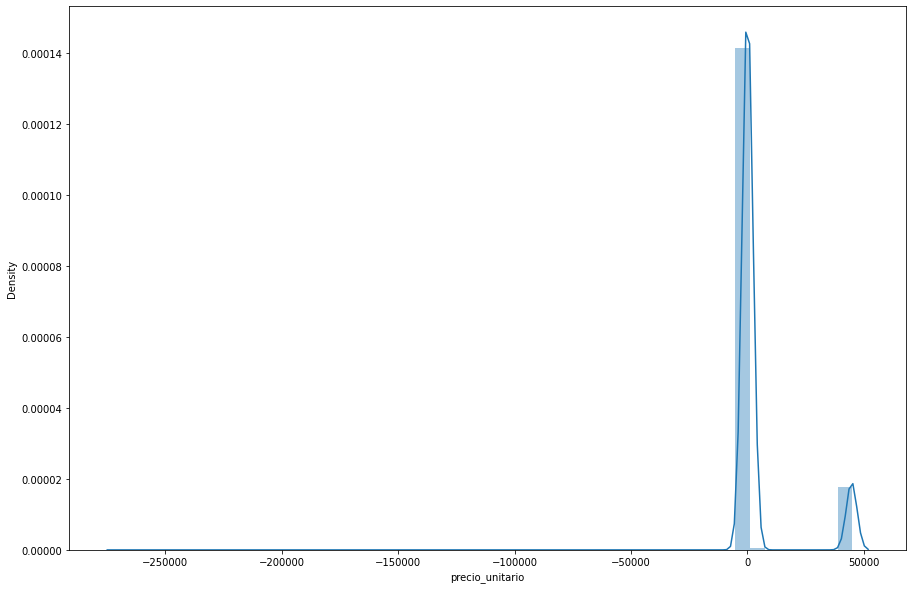

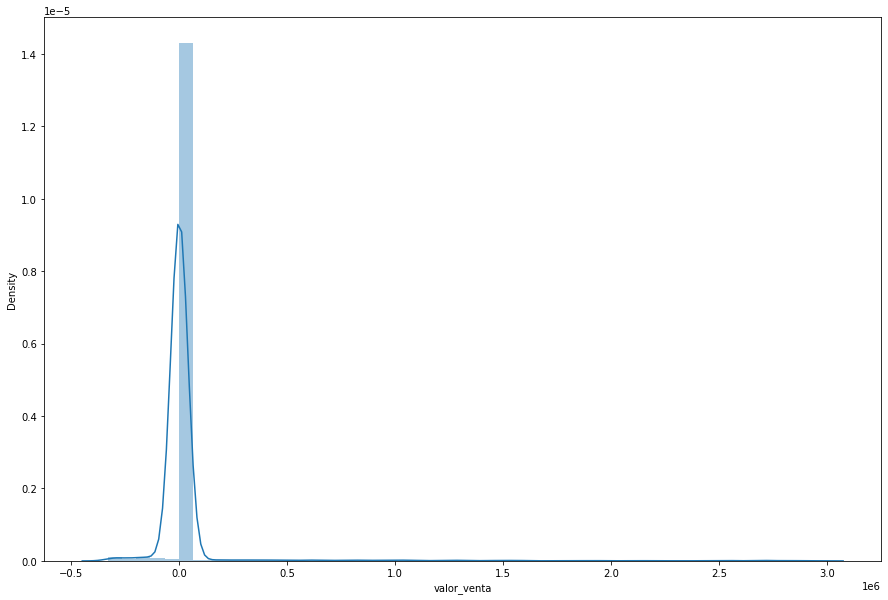

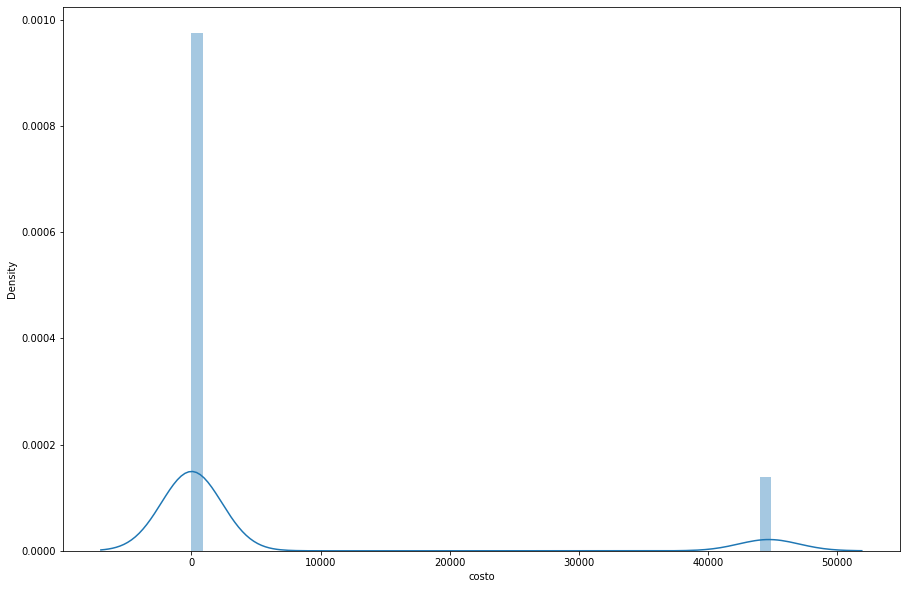

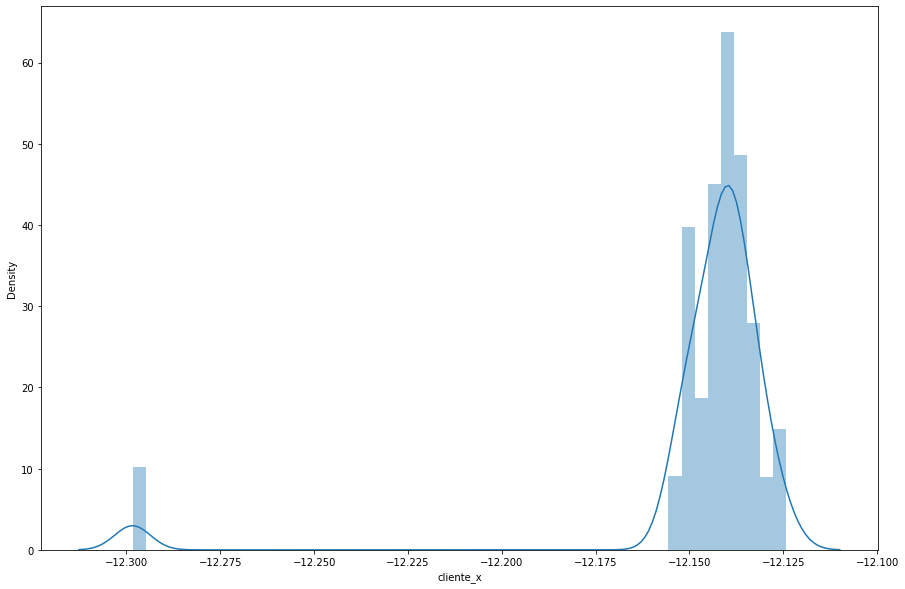

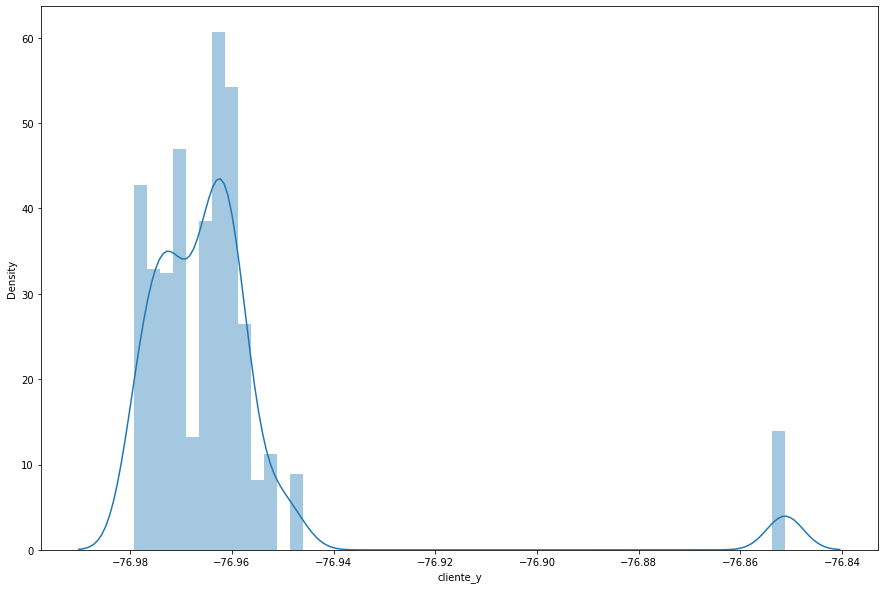

In [38]:
for x in range(len(columna_numerica)):
  plt.figure(figsize=(15,10))
  sns.distplot(train[columna_numerica[x]])
plt.show()

In [39]:
# Varianza de las columnas numericas
train.loc[:,columna_numerica].var()

cantidad           5.494660e+01
precio_unitario    2.107809e+08
valor_venta        6.202711e+10
costo              2.174519e+08
cliente_x          9.034577e-04
cliente_y          5.132101e-04
dtype: float64

In [40]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['cantidad']))
fig.update_layout(title='Tipo Cantidad')
fig.show()

print('La cantida varia desde la cantidad 5 hasta 10 con una media de 7')

La cantida varia desde la cantidad 5 hasta 10 con una media de 7


In [41]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['precio_unitario']))
fig.update_layout(title='Precio Unitario')
fig.show()

print('Existe valores negativos en los precios unitarios')


Existe valores negativos en los precios unitarios


In [42]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['valor_venta']))
fig.update_layout(title='Valor de Venta')
fig.show()

In [43]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['costo']))
fig.update_layout(title='Costos')
fig.show()

In [44]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['cliente_x']))
fig.update_layout(title='Boxplot Costos')
fig.show()
print('Existe valores atipicos, dentro del boxplot de  costos')

Existe valores atipicos, dentro del boxplot de  costos


In [45]:
columna_numerica

['cantidad',
 'precio_unitario',
 'valor_venta',
 'costo',
 'cliente_x',
 'cliente_y']

In [46]:
fig = go.Figure()
fig.add_trace(go.Box(x=train['precio_unitario']))
fig.update_layout(title='Precio Unitario')
fig.show()

In [47]:
train.corr()

,cantidad,precio_unitario,valor_venta,costo,cliente_x,cliente_y
cantidad,1.000000,0.173579,0.109154,0.048211,-0.181979,0.193796
precio_unitario,0.173579,1.000000,-0.014114,0.042215,-0.031972,0.025051
valor_venta,0.109154,-0.014114,1.000000,0.008224,-0.036073,0.023704
costo,0.048211,0.042215,0.008224,1.000000,-0.007522,-0.000457
cliente_x,-0.181979,-0.031972,-0.036073,-0.007522,1.000000,-0.875576
cliente_y,0.193796,0.025051,0.023704,-0.000457,-0.875576,1.000000


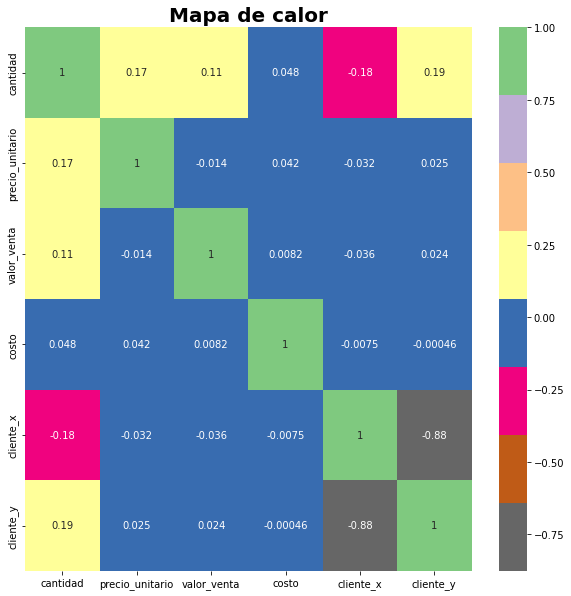

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True,cmap=plt.cm.Accent_r)
plt.title('Mapa de calor',fontweight='bold',fontname='Times New Roman', fontsize=20)
plt.show()

**Preprocessing de los valores nulos**

In [49]:
columnas_nulos=train.columns[train.isnull().any()]

In [50]:
train[columnas_nulos].isnull().sum()

precio_unitario    2
valor_venta        3
costo              2
dtype: int64

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             9999 non-null   object 
 1   cliente_cod      9999 non-null   object 
 2   tipo_cliente     9999 non-null   object 
 3   cantidad         9999 non-null   float64
 4   precio_unitario  9997 non-null   float64
 5   valor_venta      9996 non-null   float64
 6   costo            9997 non-null   float64
 7   equipo           9999 non-null   object 
 8   tipo_venta       9999 non-null   object 
 9   cliente_x        9999 non-null   float64
 10  cliente_y        9999 non-null   float64
dtypes: float64(6), object(5)
memory usage: 859.4+ KB


In [52]:
nan_rows = train[train.isnull().any(1)]
nan_rows

,pais,cliente_cod,tipo_cliente,cantidad,precio_unitario,valor_venta,costo,equipo,tipo_venta,cliente_x,cliente_y
11,D1,C142,CLIENTE E,9.0,7.43,NaN,4.21,EX,VENTA EXPORTACION,-12.29839,-76.851242
27,D1,C457,CLIENTE E,16.0,NaN,-196255.00,0.00,EX,VENTA EXPORTACION,-12.29839,-76.851242
42,D1,C457,CLIENTE E,16.0,195.12,NaN,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
44,D1,C457,CLIENTE E,16.0,201.60,NaN,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
45,D1,C457,CLIENTE E,16.0,NaN,13153.92,90.86,EX,VENTA EXPORTACION,-12.29839,-76.851242
46,D1,C457,CLIENTE E,16.0,192.78,14072.94,NaN,EX,VENTA EXPORTACION,-12.29839,-76.851242
47,D1,C457,CLIENTE E,16.0,194.70,14213.10,NaN,EX,VENTA EXPORTACION,-12.29839,-76.851242


In [53]:
#la mayoria de columna vacias son numericas
nan_rows.isnull().sum()

pais               0
cliente_cod        0
tipo_cliente       0
cantidad           0
precio_unitario    2
valor_venta        3
costo              2
equipo             0
tipo_venta         0
cliente_x          0
cliente_y          0
dtype: int64

**Definir la matriz de características X,y**

x : son las variables predictoras, explicativas, independientes, input

y : es la variable target , respuesta , objetivo, dependiente, output

In [54]:
a=train.iloc[:,2:]
a.sample(10)

,tipo_cliente,cantidad,precio_unitario,valor_venta,costo,equipo,tipo_venta,cliente_x,cliente_y
4937,CLIENTE A,3.0,46.80,514.80,22.64,E3,VENTA LOCAL,-12.151818,-76.964438
8912,CLIENTE A,7.0,1.19,593.22,0.63,E1,VENTA LOCAL,-12.127676,-76.951224
3378,CLIENTE E,20.0,1.47,211.83,1.33,EX,VENTA EXPORTACION,-12.144170,-76.972090
13,CLIENTE E,9.0,7.54,958795.00,4.21,EX,VENTA EXPORTACION,-12.298390,-76.851242
4068,CLIENTE A,1.0,148.31,2817.79,116.00,E8,VENTA LOCAL,-12.133127,-76.964414
7895,CLIENTE A,7.0,1.36,271.19,0.64,E3,VENTA LOCAL,-12.138598,-76.975830
6311,CLIENTE A,5.0,47.46,284.76,44881.00,E3,VENTA LOCAL,-12.148835,-76.972871
3564,CLIENTE E,20.0,44622.00,878.53,1.45,EX,VENTA EXPORTACION,-12.137362,-76.963693
4343,CLIENTE A,2.0,44656.00,201.60,1.44,E3,VENTA LOCAL,-12.138491,-76.971567
956,CLIENTE E,20.0,2.31,5553.34,44713.00,EX,VENTA EXPORTACION,-12.137965,-76.966687


In [55]:
X=pd.get_dummies(a)
X.drop(columns='valor_venta',inplace=True)
X.head()

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,tipo_cliente_CLIENTE E,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA EXPORTACION,tipo_venta_VENTA LOCAL
0,9.0,44690.00,9.34,-12.29839,-76.851242,0,1,0,0,0,0,0,0,1,0,1,0
1,9.0,7.43,4.21,-12.29839,-76.851242,0,1,0,0,0,0,0,0,1,0,1,0
2,9.0,9.47,6.77,-12.29839,-76.851242,0,1,0,0,0,0,0,0,1,0,1,0
3,9.0,9.66,7.68,-12.29839,-76.851242,0,1,0,0,0,0,0,0,1,0,1,0
4,9.0,9.82,7.78,-12.29839,-76.851242,0,1,0,0,0,0,0,0,1,0,1,0


In [56]:
columnas_X = list(X.columns)
columnas_X

['cantidad',
 'precio_unitario',
 'costo',
 'cliente_x',
 'cliente_y',
 'tipo_cliente_CLIENTE A',
 'tipo_cliente_CLIENTE E',
 'equipo_E0',
 'equipo_E1',
 'equipo_E2',
 'equipo_E3',
 'equipo_E7',
 'equipo_E8',
 'equipo_EX',
 'equipo_EZ',
 'tipo_venta_VENTA EXPORTACION',
 'tipo_venta_VENTA LOCAL']

In [57]:
y=train['valor_venta']
y

0       5700.24
1       4323.68
2       3410.75
3       1738.26
4       2238.16
         ...   
9994     118.64
9995     381.36
9996     381.36
9997      19.32
9998      32.20
Name: valor_venta, Length: 9999, dtype: float64

**Train Test Split**

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [59]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7999, 17) (2000, 17) (7999,) (2000,)


**KNN con n= 5**

In [60]:
from sklearn.impute import KNNImputer

In [61]:
imputer = KNNImputer(n_neighbors = 5,weights='uniform',metric='nan_euclidean')

In [62]:
# recuperamos valores perdidos
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [63]:
X = np.concatenate((X_train,X_test), axis = 0)
y = np.concatenate((y_train,y_test), axis = 0)

In [64]:
X.shape

(9999, 17)

In [65]:
y.reshape(-1,1).shape

(9999, 1)

In [66]:
y.reshape(-1,1)

array([[ 93.23],
       [297.  ],
       [932.2 ],
       ...,
       [ 84.  ],
       [757.49],
       [127.12]])

In [67]:
train_i = np.concatenate((X,y.reshape(-1,1)), axis =1)

In [68]:
type(train_i)

numpy.ndarray

In [69]:
train_new=pd.DataFrame(train_i)
train_new.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
6680,3.0,72.03,24.67,-12.139719,-76.970784,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1440.68
7721,7.0,0.99,0.67,-12.138598,-76.975830,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,297.00
4546,3.0,33.99,23.48,-12.151818,-76.964438,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1767.48
9103,3.0,46.80,25.27,-12.151818,-76.964438,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-232506.00
3471,7.0,0.99,0.67,-12.138598,-76.975830,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,495.00
1454,20.0,1.69,0.86,-12.130190,-76.959040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.26
7819,20.0,2.52,44774.00,-12.137362,-76.963693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2724.32
4423,20.0,2.96,1.86,-12.298390,-76.851242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2345.22
7326,7.0,0.93,0.72,-12.153668,-76.965637,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,139.85
3081,5.0,54.23,15.97,-12.143511,-76.963516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,542.30


In [70]:
train_new.columns

RangeIndex(start=0, stop=18, step=1)

In [71]:
train_new.columns=columnas_X + ['target']

In [72]:
train_new.head(4)

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,tipo_cliente_CLIENTE E,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA EXPORTACION,tipo_venta_VENTA LOCAL,target
0,7.0,0.93,0.75,-12.141541,-76.978708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.23
1,7.0,0.99,0.68,-12.138598,-76.975830,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,297.00
2,5.0,46.61,15.97,-12.137371,-76.963679,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,932.20
3,20.0,1.35,0.78,-12.151824,-76.971487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4851.61


In [73]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cantidad                      9999 non-null   float64
 1   precio_unitario               9999 non-null   float64
 2   costo                         9999 non-null   float64
 3   cliente_x                     9999 non-null   float64
 4   cliente_y                     9999 non-null   float64
 5   tipo_cliente_CLIENTE A        9999 non-null   float64
 6   tipo_cliente_CLIENTE E        9999 non-null   float64
 7   equipo_E0                     9999 non-null   float64
 8   equipo_E1                     9999 non-null   float64
 9   equipo_E2                     9999 non-null   float64
 10  equipo_E3                     9999 non-null   float64
 11  equipo_E7                     9999 non-null   float64
 12  equipo_E8                     9999 non-null   float64
 13  equ

In [74]:
train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad,9999.0,11.051905,7.412597,1.000000,5.000000,7.000000,20.000000,2.300000e+01
precio_unitario,9999.0,4929.187782,14516.997846,-267996.000000,1.330000,2.750000,59.320000,4.492200e+04
costo,9999.0,5569.126208,14744.982934,0.000000,0.700000,1.570000,23.340000,4.490800e+04
cliente_x,9999.0,-12.146228,0.030058,-12.298390,-12.146970,-12.140159,-12.137284,-1.212424e+01
cliente_y,9999.0,-76.962303,0.022654,-76.979314,-76.972372,-76.965502,-76.960568,-7.685124e+01
tipo_cliente_CLIENTE A,9999.0,0.599660,0.489992,0.000000,0.000000,1.000000,1.000000,1.000000e+00
tipo_cliente_CLIENTE E,9999.0,0.400340,0.489992,0.000000,0.000000,0.000000,1.000000,1.000000e+00
equipo_E0,9999.0,0.046905,0.211445,0.000000,0.000000,0.000000,0.000000,1.000000e+00
equipo_E1,9999.0,0.190919,0.393045,0.000000,0.000000,0.000000,0.000000,1.000000e+00
equipo_E2,9999.0,0.090209,0.286495,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [75]:
train_new.sample(10)

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,tipo_cliente_CLIENTE E,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA EXPORTACION,tipo_venta_VENTA LOCAL,target
5852,7.0,1.27,0.68,-12.127676,-76.951224,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,508.47
3875,20.0,2.47,1.27,-12.143242,-76.965747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,355.06
7375,5.0,127.12,50.01,-12.145436,-76.973075,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,508.47
113,20.0,1.74,0.99,-12.136889,-76.957485,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,188.42
292,5.0,15.68,6.48,-12.142594,-76.961632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.71
4547,3.0,33.99,24.67,-12.151818,-76.964438,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2209.35
838,1.0,65.48,24.26,-12.146970,-76.977332,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.48
9911,20.0,44682.00,44866.00,-12.132633,-76.960705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1080.22
2386,20.0,1.64,44652.00,-12.143242,-76.965747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1177.92
291,20.0,2.74,0.00,-12.130190,-76.959040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,197.10


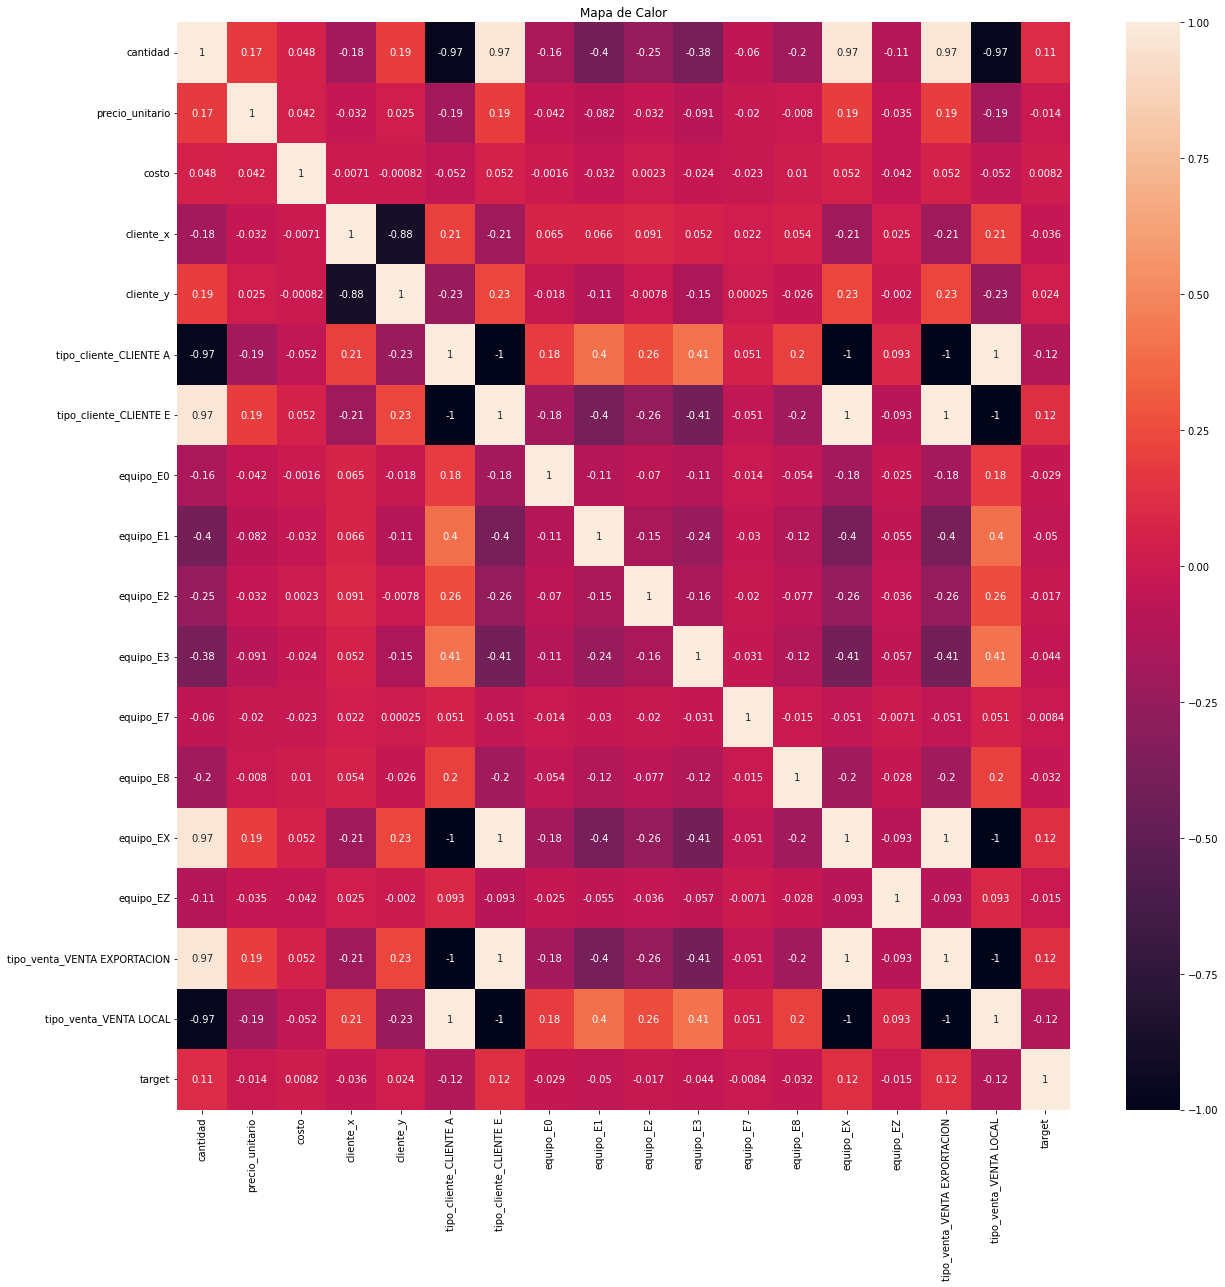

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(train_new.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [77]:
#eliminar variables para evitar la multicolinealidad
train_new=train_new.drop(columns=['tipo_cliente_CLIENTE E','tipo_venta_VENTA EXPORTACION'])

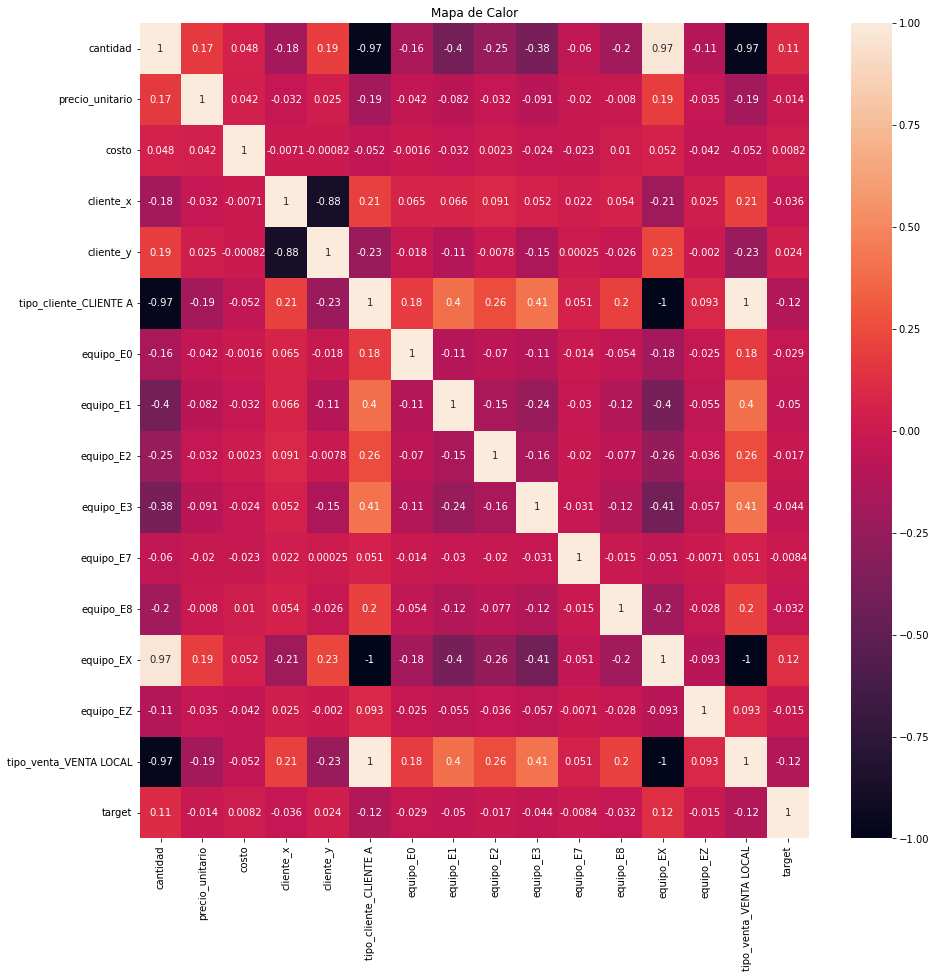

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(train_new.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [79]:
train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad,9999.0,11.051905,7.412597,1.000000,5.000000,7.000000,20.000000,2.300000e+01
precio_unitario,9999.0,4929.187782,14516.997846,-267996.000000,1.330000,2.750000,59.320000,4.492200e+04
costo,9999.0,5569.126208,14744.982934,0.000000,0.700000,1.570000,23.340000,4.490800e+04
cliente_x,9999.0,-12.146228,0.030058,-12.298390,-12.146970,-12.140159,-12.137284,-1.212424e+01
cliente_y,9999.0,-76.962303,0.022654,-76.979314,-76.972372,-76.965502,-76.960568,-7.685124e+01
tipo_cliente_CLIENTE A,9999.0,0.599660,0.489992,0.000000,0.000000,1.000000,1.000000,1.000000e+00
equipo_E0,9999.0,0.046905,0.211445,0.000000,0.000000,0.000000,0.000000,1.000000e+00
equipo_E1,9999.0,0.190919,0.393045,0.000000,0.000000,0.000000,0.000000,1.000000e+00
equipo_E2,9999.0,0.090209,0.286495,0.000000,0.000000,0.000000,0.000000,1.000000e+00
equipo_E3,9999.0,0.198320,0.398754,0.000000,0.000000,0.000000,0.000000,1.000000e+00


# Pregunta 2

Con la data imputada hacer un modelo lineal simple.Para predecir valor_venta, usar la variable con  mayor correlación posible como X.

Hacer el plot del modelo , determinar los coeficientes y MAE


In [80]:
train_new.isnull().sum()

cantidad                  0
precio_unitario           0
costo                     0
cliente_x                 0
cliente_y                 0
tipo_cliente_CLIENTE A    0
equipo_E0                 0
equipo_E1                 0
equipo_E2                 0
equipo_E3                 0
equipo_E7                 0
equipo_E8                 0
equipo_EX                 0
equipo_EZ                 0
tipo_venta_VENTA LOCAL    0
target                    3
dtype: int64

In [81]:
train_new.dropna(inplace=True)

In [82]:
train_new.isnull().sum()

cantidad                  0
precio_unitario           0
costo                     0
cliente_x                 0
cliente_y                 0
tipo_cliente_CLIENTE A    0
equipo_E0                 0
equipo_E1                 0
equipo_E2                 0
equipo_E3                 0
equipo_E7                 0
equipo_E8                 0
equipo_EX                 0
equipo_EZ                 0
tipo_venta_VENTA LOCAL    0
target                    0
dtype: int64

In [83]:
train_new.sample(10)

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA LOCAL,target
2706,7.0,0.93,0.68,-12.137362,-76.963693,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.22
9534,20.0,2.33,1.68,-12.137362,-76.963693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1344884.00
1617,20.0,2.26,44805.00,-12.140159,-76.960568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,977.40
158,7.0,1.27,0.67,-12.141541,-76.978708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.71
1658,20.0,2.41,1.32,-12.137965,-76.966687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2604.59
2669,3.0,72.03,24.39,-12.139520,-76.960932,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432.20
3583,5.0,44.07,44881.00,-12.135813,-76.957580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,440.68
5286,7.0,0.95,0.60,-12.151149,-76.969612,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,189.83
2833,20.0,2.86,1.51,-12.131246,-76.958430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1546.57
4518,20.0,1.36,0.81,-12.143242,-76.965747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8186.18


In [84]:
new_cols=train_new.columns[:-1]

In [85]:
new_cols

Index(['cantidad', 'precio_unitario', 'costo', 'cliente_x', 'cliente_y',
       'tipo_cliente_CLIENTE A', 'equipo_E0', 'equipo_E1', 'equipo_E2',
       'equipo_E3', 'equipo_E7', 'equipo_E8', 'equipo_EX', 'equipo_EZ',
       'tipo_venta_VENTA LOCAL'],
      dtype='object')

In [86]:
X=train_new.loc[:,new_cols]

In [87]:
X.sample(10)

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA LOCAL
7213,7.0,1.27,0.64,-12.141541,-76.978708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5996,7.0,0.93,0.67,-12.127676,-76.951224,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7770,1.0,177.97,118.08,-12.146970,-76.977332,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
304,2.0,30.51,44573.00,-12.133127,-76.964414,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6899,8.0,3.81,44714.00,-12.141287,-76.978684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
885,7.0,0.89,0.72,-12.151149,-76.969612,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6050,7.0,0.93,0.69,-12.138598,-76.975830,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1505,7.0,1.36,0.68,-12.141541,-76.978708,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4372,1.0,148.31,119.39,-12.133127,-76.964414,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1583,20.0,2.36,1.74,-12.298390,-76.851242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
y=train_new['target']
y.sample(10)

5837    11760.94
7597      528.81
3185       93.00
4929     7781.78
8280     1186.44
4449      650.88
6891     5338.98
2772    11063.05
3380      594.00
1609      465.00
Name: target, dtype: float64

**Train Test Split**

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [90]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7996, 15) (2000, 15) (7996,) (2000,)


**Moda Lineal Multiple**

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [93]:
linear_regression_prediction=linear_regression.predict(X_test)

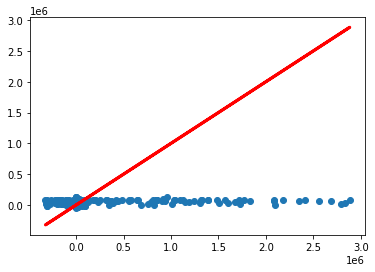

In [95]:
plt.scatter(y_test,linear_regression_prediction)
plt.plot(y_test,y_test, color ='red', linewidth =3)
plt.show()

**Capacidad Predictiva**

In [96]:
linear_regression_mse=mean_squared_error(y_test,linear_regression_prediction)
linear_regression_rmse=np.sqrt(linear_regression_mse)

In [98]:
print('MSE: {0}\n RMSE: {1}'.format(linear_regression_mse.round(4),linear_regression_rmse.round(4)))

MSE: 61611950122.7528
 RMSE: 248217.546


In [100]:
r2_score(y_test,linear_regression_prediction).round(4)

0.0181

In [101]:
scores = cross_val_score(linear_regression, X_train, y_train, cv = 10)

In [102]:
scores

array([0.01553307, 0.01761597, 0.01135643, 0.0159548 , 0.01243898,
       0.0067433 , 0.02366494, 0.01712863, 0.01870134, 0.00847876])

In [104]:
scores.mean().round(4)

0.0148

# Pregunta 3

Realizar un feature selection con Boruta para eliminar variables que no aportan al modelo. Realizar un modelo lineal múltiple con las variables que sí son relevantes. Determinar los coeficientes y MAE del modelo


In [105]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 1.8 MB/s eta 0:00:00


In [107]:
from boruta import BorutaPy
from __future__ import print_function
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [108]:
train_new.sample(10)

,cantidad,precio_unitario,costo,cliente_x,cliente_y,tipo_cliente_CLIENTE A,equipo_E0,equipo_E1,equipo_E2,equipo_E3,equipo_E7,equipo_E8,equipo_EX,equipo_EZ,tipo_venta_VENTA LOCAL,target
8703,20.0,2.64,1.55,-12.137965,-76.966687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9503.24
2916,7.0,0.99,0.68,-12.138598,-76.975830,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,297.00
3006,8.0,44624.00,44714.00,-12.137362,-76.963693,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,96.72
933,3.0,57.63,24.39,-12.131847,-76.958244,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,115.25
1469,5.0,21.19,7.97,-12.143511,-76.963516,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,211.86
2162,7.0,0.85,0.67,-12.141541,-76.978708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.00
4451,3.0,57.63,24.31,-12.124235,-76.947899,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.25
7808,2.0,1.32,0.61,-12.144535,-76.977755,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,264.41
6786,3.0,72.03,44736.00,-12.137284,-76.961481,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,360.17
2485,20.0,2.41,1.28,-12.298390,-76.851242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10835.82


In [109]:
train_new.shape

(9996, 16)

In [111]:
train_new.dropna(inplace=True)
train_new.isnull().sum()

cantidad                  0
precio_unitario           0
costo                     0
cliente_x                 0
cliente_y                 0
tipo_cliente_CLIENTE A    0
equipo_E0                 0
equipo_E1                 0
equipo_E2                 0
equipo_E3                 0
equipo_E7                 0
equipo_E8                 0
equipo_EX                 0
equipo_EZ                 0
tipo_venta_VENTA LOCAL    0
target                    0
dtype: int64

**Matriz Caracteristica**

In [112]:
X=train_new.iloc[:,:-1].values
print(X.shape)

(9996, 15)


In [113]:
y=train_new['target']
y

0         93.23
1        297.00
2        932.20
3       4851.61
4         67.80
         ...   
9994      46.61
9995    1726.32
9996      84.00
9997     757.49
9998     127.12
Name: target, Length: 9996, dtype: float64

In [114]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

**Generamos el modelo Boruta**

In [115]:
random_forest_classifier=RandomForestRegressor(n_estimators = 200, n_jobs=4, max_depth = 6)
boruta_selector = BorutaPy(random_forest_classifier, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	13
I

In [116]:
print ('\n Initial features: ', train_new.iloc[:,:-1].columns.tolist())

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)


 Initial features:  ['cantidad', 'precio_unitario', 'costo', 'cliente_x', 'cliente_y', 'tipo_cliente_CLIENTE A', 'equipo_E0', 'equipo_E1', 'equipo_E2', 'equipo_E3', 'equipo_E7', 'equipo_E8', 'equipo_EX', 'equipo_EZ', 'tipo_venta_VENTA LOCAL']

 Number of selected features:
1


In [117]:
feature_train_new=train_new.iloc[:,:-1].columns.tolist()
feature_train_new

['cantidad',
 'precio_unitario',
 'costo',
 'cliente_x',
 'cliente_y',
 'tipo_cliente_CLIENTE A',
 'equipo_E0',
 'equipo_E1',
 'equipo_E2',
 'equipo_E3',
 'equipo_E7',
 'equipo_E8',
 'equipo_EX',
 'equipo_EZ',
 'tipo_venta_VENTA LOCAL']

In [118]:
print ('\n Feature ranking:')
print (boruta_selector.ranking_)


 Feature ranking:
[ 3  1  2  5  4 12 10  7  8  6 14  8 11 14 12]


In [119]:
selected = train_new.drop(['target'], axis=1).columns[boruta_selector.support_]
train = train_new[selected]
train['target'] = y

In [120]:
train.head()

,precio_unitario,target
0,0.93,93.23
1,0.99,297.00
2,46.61,932.20
3,1.35,4851.61
4,67.80,67.80


In [124]:
train.describe()

,precio_unitario,target
count,9996.000000,9.996000e+03
mean,4930.626699,3.372012e+04
std,14518.938563,2.490524e+05
min,-267996.000000,-3.287160e+05
25%,1.330000,1.780000e+02
50%,2.750000,5.282650e+02
75%,59.320000,1.765665e+03
max,44922.000000,2.955057e+06


In [123]:
#exportamos la data 
train.to_excel('train_boruta_filtered.xlsx', index=False)